<a href="https://colab.research.google.com/github/Dzakiyaadila/Bike-Sharing-dataset/blob/main/Statistika_Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (1) Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# (2) Load dataset
url = 'https://raw.githubusercontent.com/rizkylaksmitha/bike-sharing-dataset/main/day.csv'
df = pd.read_csv(url)

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
Shape: (731, 16)
Columns: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

First 5 rows:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000 

Missing values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Basic statistics:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.0

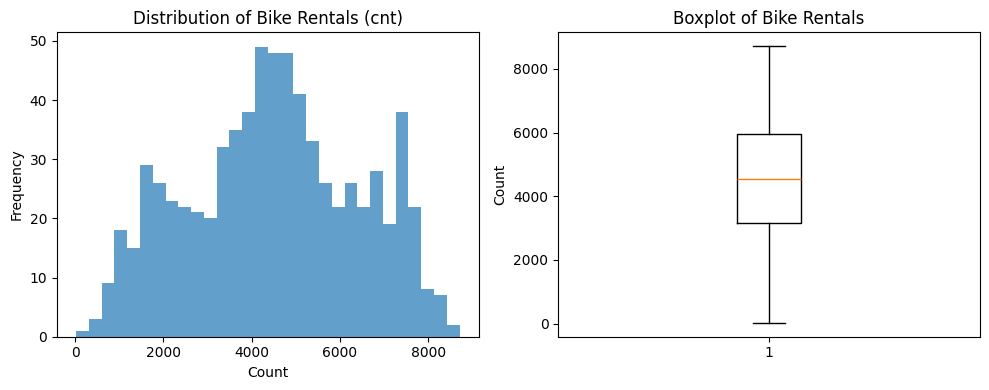

In [ ]:
# (3) EDA & Preprocessing
print("Missing values:")
print(df.isnull().sum())

print("\nBasic statistics:")
print(df.describe())

print("\nData types:")
print(df.dtypes)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['cnt'], bins=30, alpha=0.7)
plt.title('Distribution of Bike Rentals (cnt)')
plt.xlabel('Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['cnt'])
plt.title('Boxplot of Bike Rentals')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Drop redundant columns
df_clean = df.drop(['instant', 'dteday', 'casual', 'registered', 'temp', 'mnth'], axis=1)

# One-hot encoding
df_clean = pd.get_dummies(df_clean, columns=['season', 'weathersit'], drop_first=False)

season_mapping = {
    'season_1': 'season_winter',
    'season_2': 'season_spring',
    'season_3': 'season_summer',
    'season_4': 'season_fall'
}
weather_mapping = {
    'weathersit_1': 'weather_clear',
    'weathersit_2': 'weather_cloudy',
    'weathersit_3': 'weather_light_rain',
    'weathersit_4': 'weather_heavy_rain'
}
df_clean.rename(columns={**season_mapping, **weather_mapping}, inplace=True)

In [ ]:
# (4) Split features and target
X = df_clean.drop(['cnt'], axis=1)
y = df_clean['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Features: {list(X.columns)}")
print(f"Target: cnt")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training ratio: {X_train.shape[0]/len(X)*100:.1f}%")
print(f"Testing ratio: {X_test.shape[0]/len(X)*100:.1f}%")

Features: ['yr', 'holiday', 'weekday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_winter', 'season_spring', 'season_summer', 'season_fall', 'weather_clear', 'weather_cloudy', 'weather_light_rain']
Target: cnt
X_train shape: (584, 14)
y_train shape: (584,)
Training set: 584 samples
Testing set: 147 samples
Training ratio: 79.9%
Testing ratio: 20.1%


In [ ]:
# (5) Train model
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Konstanta: {model.intercept_:.2f}")
print(model.coef_.shape)
print("\nKoefisien:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

Konstanta: 1074.34
(14,)

Koefisien:
yr: 2006.72
holiday: -407.79
weekday: 73.09
workingday: 152.41
atemp: 5591.72
hum: -1050.90
windspeed: -2155.41
season_winter: -921.24
season_spring: 281.13
season_summer: -29.85
season_fall: 669.96
weather_clear: 762.82
weather_cloudy: 250.44
weather_light_rain: -1013.26


In [ ]:
# (6) Predictions & Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("MODEL EVALUATION RESULTS:")
print("-" * 40)
print(f"R-squared (Training): {r2_train:.4f}")
print(f"R-squared (Testing):  {r2_test:.4f}")
print(f"RMSE (Training):      {rmse_train:.2f}")
print(f"RMSE (Testing):       {rmse_test:.2f}")
print(f"MSE (Training):       {mse_train:.2f}")
print(f"MSE (Testing):        {mse_test:.2f}")

print("\nMODEL PERFORMANCE:")
if r2_test > 0.8:
    print("Excellent model performance!")
elif r2_test > 0.6:
    print("Good model performance!")
elif r2_test > 0.4:
    print("Moderate model performance.")
else:
    print("Poor model performance - needs improvement.")

MODEL EVALUATION RESULTS:
----------------------------------------
R-squared (Training): 0.8191
R-squared (Testing):  0.8396
RMSE (Training):      814.39
RMSE (Testing):       802.08
MSE (Training):       663234.83
MSE (Testing):        643328.01

MODEL PERFORMANCE:
Excellent model performance!


MODEL COEFFICIENTS (Ranked by importance):
--------------------------------------------------
Intercept: 1074.3399

Feature coefficients:
atemp          : 5591.7236 (increases rentals)
windspeed      : -2155.4148 (decreases rentals)
yr             : 2006.7240 (increases rentals)
hum            : -1050.9010 (decreases rentals)
weather_light_rain: -1013.2583 (decreases rentals)
season_winter  : -921.2382 (decreases rentals)
weather_clear  : 762.8194 (increases rentals)
season_fall    : 669.9588 (increases rentals)
holiday        : -407.7938 (decreases rentals)
season_spring  : 281.1295 (increases rentals)
weather_cloudy : 250.4388 (increases rentals)
workingday     : 152.4084 (increases rentals)
weekday        :  73.0850 (increases rentals)
season_summer  : -29.8501 (decreases rentals)


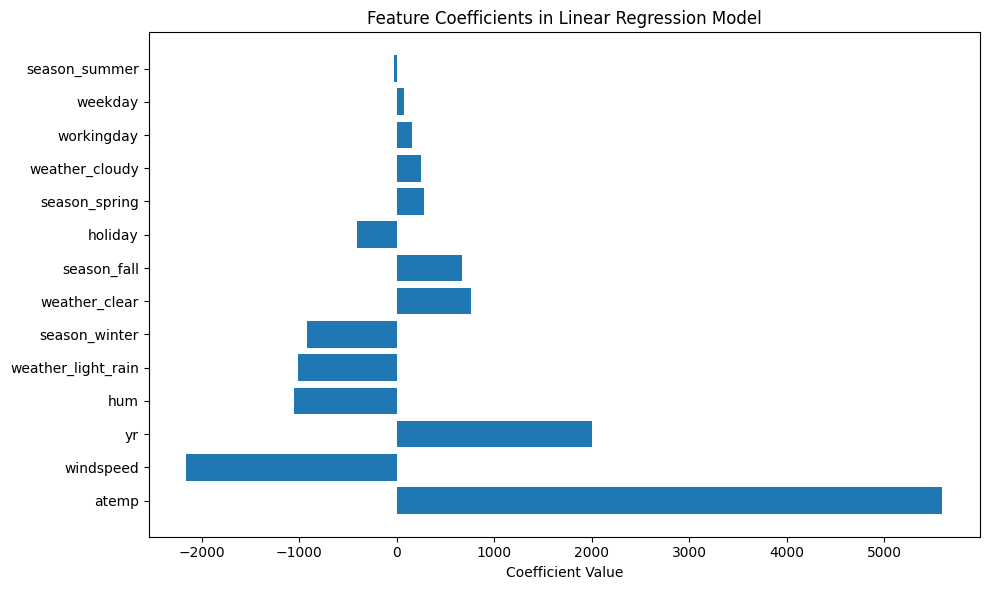

In [ ]:
# (7) Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("MODEL COEFFICIENTS (Ranked by importance):")
print("-" * 50)
print(f"Intercept: {model.intercept_:.4f}")
print("\nFeature coefficients:")
for idx, row in coef_df.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"{row['Feature']:15s}: {row['Coefficient']:8.4f} ({direction} rentals)")

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Feature Coefficients in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

In [ ]:
# (8) Comparison with actual values
print("PREDICTIONS vs ACTUAL VALUES (First 10 test samples):")
print("-" * 60)
comparison_df = pd.DataFrame({
    'Actual': y_test.iloc[:10].values,
    'Predicted': y_test_pred[:10],
    'Difference': np.abs(y_test.iloc[:10].values - y_test_pred[:10])
})
comparison_df['Accuracy'] = (1 - comparison_df['Difference'] / comparison_df['Actual']) * 100

for i in range(len(comparison_df)):
    print(f"Sample {i+1:2d}: Actual={comparison_df.iloc[i]['Actual']:6.0f}, "
          f"Predicted={comparison_df.iloc[i]['Predicted']:6.0f}, "
          f"Diff={comparison_df.iloc[i]['Difference']:6.0f}, "
          f"Accuracy={comparison_df.iloc[i]['Accuracy']:5.1f}%")

PREDICTIONS vs ACTUAL VALUES (First 10 test samples):
------------------------------------------------------------
Sample  1: Actual=  6606, Predicted=  6289, Diff=   317, Accuracy= 95.2%
Sample  2: Actual=  1550, Predicted=  1297, Diff=   253, Accuracy= 83.6%
Sample  3: Actual=  3747, Predicted=  3185, Diff=   562, Accuracy= 85.0%
Sample  4: Actual=  6041, Predicted=  4864, Diff=  1177, Accuracy= 80.5%
Sample  5: Actual=  7538, Predicted=  6747, Diff=   791, Accuracy= 89.5%
Sample  6: Actual=  7264, Predicted=  6829, Diff=   435, Accuracy= 94.0%
Sample  7: Actual=  1605, Predicted=   655, Diff=   950, Accuracy= 40.8%
Sample  8: Actual=  2209, Predicted=  2232, Diff=    23, Accuracy= 98.9%
Sample  9: Actual=  7499, Predicted=  6870, Diff=   629, Accuracy= 91.6%
Sample 10: Actual=  5743, Predicted=  6831, Diff=  1088, Accuracy= 81.1%


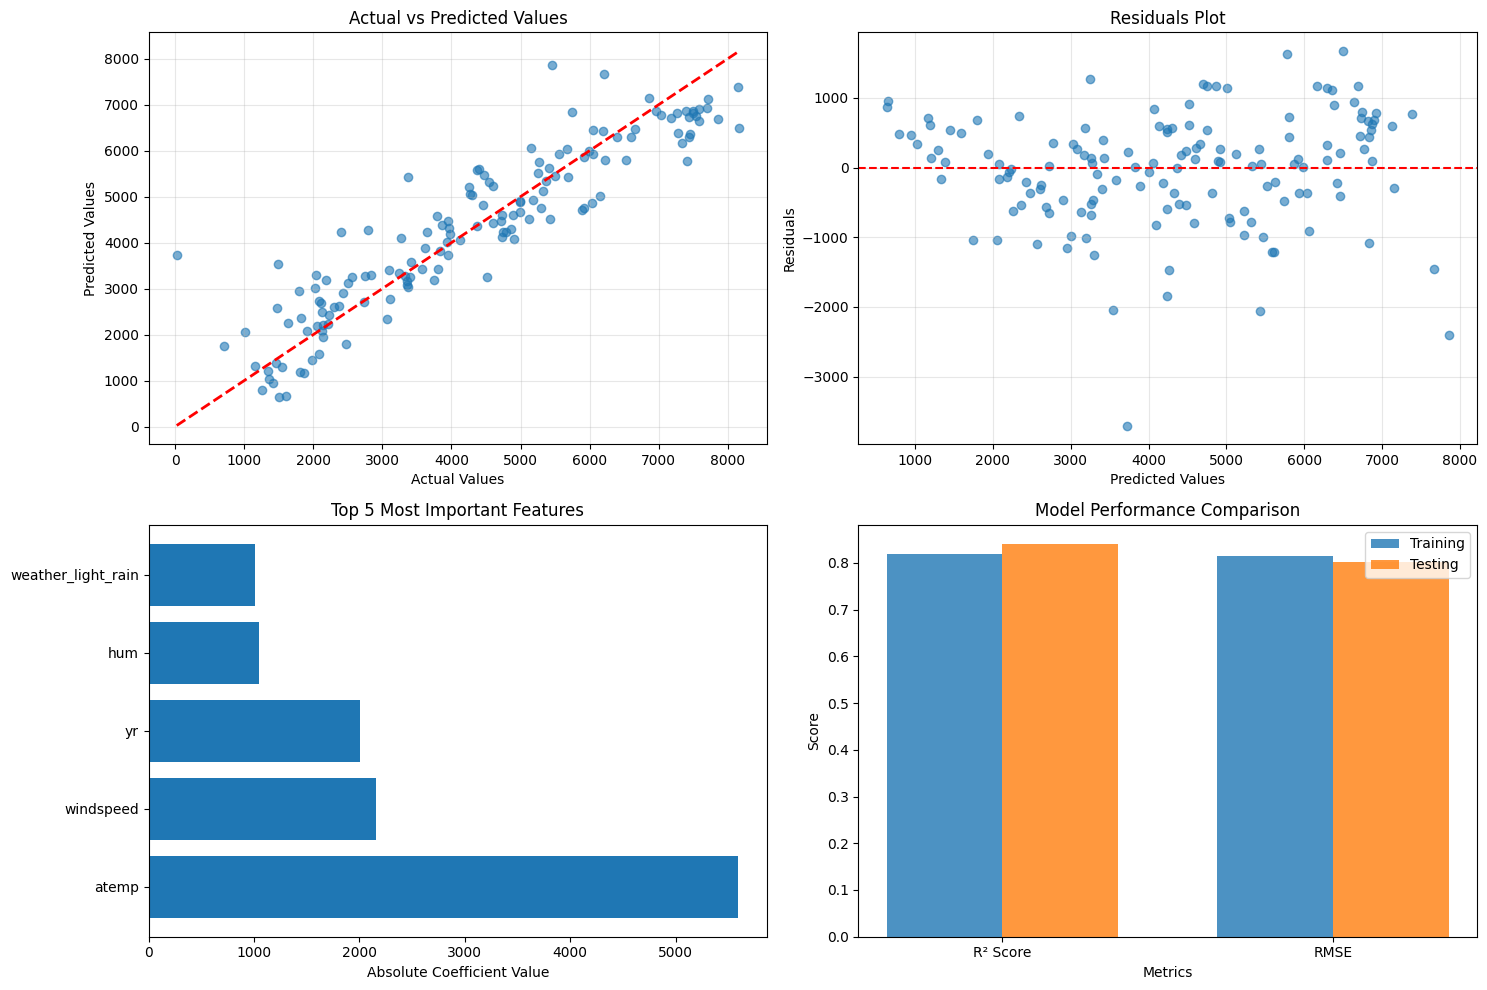

In [ ]:
# (9) Comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Actual vs Predicted
axes[0,0].scatter(y_test, y_test_pred, alpha=0.6)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Values')
axes[0,0].set_ylabel('Predicted Values')
axes[0,0].set_title('Actual vs Predicted Values')
axes[0,0].grid(True, alpha=0.3)

# 2. Residuals plot
residuals = y_test - y_test_pred
axes[0,1].scatter(y_test_pred, residuals, alpha=0.6)
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('Predicted Values')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Residuals Plot')
axes[0,1].grid(True, alpha=0.3)

# 3. Top 5 important features
top_features = coef_df.head(5)
axes[1,0].barh(top_features['Feature'], top_features['Abs_Coefficient'])
axes[1,0].set_xlabel('Absolute Coefficient Value')
axes[1,0].set_title('Top 5 Most Important Features')

# 4. Train vs Test Metrics
metrics = ['R² Score', 'RMSE']
train_scores = [r2_train, rmse_train / 1000]
test_scores = [r2_test, rmse_test / 1000]

x = np.arange(len(metrics))
width = 0.35

axes[1,1].bar(x - width/2, train_scores, width, label='Training', alpha=0.8)
axes[1,1].bar(x + width/2, test_scores, width, label='Testing', alpha=0.8)
axes[1,1].set_xlabel('Metrics')
axes[1,1].set_ylabel('Score')
axes[1,1].set_title('Model Performance Comparison')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(metrics)
axes[1,1].legend()

plt.tight_layout()
plt.show()